In [44]:
# Display all of code cell's output instead of just the print statements and the last line 
# Source: https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Notebook prerequisites

This notebook uses a few features of Jupyter Notebooks that are a bit advanced: 

1. Run command line commands from inside the notebook using the `!<command>` syntax in a code cell. For example:

In [49]:
!ls # same as running "ls" in the directory where you run "jupyter notebook"

__pycache__      ssshtest.sh      test_math_lib.py
math_lib.py      test.py          testing.ipynb


In [53]:
%cd /
!ls

/
Applications Users        cores        home         sbin         var
Library      Volumes      dev          opt          tmp
System       bin          etc          private      usr


# Learning objectives

(Hopefully) After reading this notebook you should be able to articulate:

1. why including tests is an important part of software development
2. what unit and functional tests are supposed to do and why both types are important
3. how to write and run simple unit tests using `pytest`
4. what is test-driven development and what do proponents of it think are its advantages

# Testing

## Why write tests at all?

Writing tests for code is a critical part of software development, as it helps ensure that the code works as expected, remains maintainable, and can evolve with fewer risks. Here are key reasons why writing tests is essential:

1. Ensure Code Quality
    
    Tests help verify that the code behaves as intended. They allow developers to check if the code produces the correct output and handles edge cases and errors correctly. By running tests regularly, developers can catch issues early, preventing bugs from making it into production.

2. Prevent Regressions

    Once a piece of code works correctly, tests ensure that future changes don’t break it. Without tests, it’s easy to introduce regressions—errors where previously working features stop working due to new changes. Automated tests help identify such issues quickly, making the development process more reliable.

3. Faster Debugging and Issue Isolation

    When something goes wrong, having tests helps developers identify where the problem is. By running tests, developers can narrow down which part of the code is failing. This makes debugging faster and reduces the time spent tracking down bugs.

4. Confidence in Refactoring

    Refactoring is the process of improving the structure of code without changing its external behavior. With tests in place, developers can confidently refactor code, knowing that if the tests still pass after changes, the functionality remains correct.

    Without tests, refactoring can be risky, as it's hard to know whether the changes have unintentionally broken the system.

5. Facilitates Continuous Integration and Delivery (CI/CD)

    In modern software development, continuous integration and delivery (CI/CD) pipelines automatically test code after each change. This ensures that new code merges into the main codebase only if it passes the tests. Automated tests in CI/CD help prevent defective code from being deployed.

6. Document Expected Behavior

    Tests act as documentation for the code. When you write tests, they show how the functions and classes are supposed to be used and what behavior is expected. This is especially useful when someone new joins the project or when revisiting old code.


    Instead of reading through complex code to understand what it does, developers can look at the tests to get a sense of how it should work.

7. Promotes Modular, Maintainable Code

    Writing tests encourages developers to write more modular code. Functions that are easier to test tend to have fewer dependencies and do one thing well. This results in cleaner, more maintainable code because the code structure often improves as you try to write testable components.

8. Improves Design and Encourages Best Practices

    When writing tests, developers often think more critically about how the code is structured. Test-driven development (TDD), where tests are written before the code itself, is one approach that pushes for better design. Even if TDD isn’t used, writing tests forces developers to consider edge cases and the overall robustness of the code.

9. Reduce Manual Testing Effort

    Testing code manually is time-consuming and error-prone. Automated tests reduce the need for manual testing by validating functionality at the code level. This makes it easier to repeatedly test the software after every change without human intervention, saving time and effort.

10. Collaboration and Consistency

    In larger teams, tests ensure consistency across different contributors. Developers can add new features or fix bugs without accidentally breaking functionality written by others. Tests serve as a contract, ensuring that everyone follows the expected behavior when modifying the codebase.

11. Catch Edge Cases and Rare Scenarios

    Well-written tests cover not only the "happy path" (where everything works as expected) but also edge cases and rare scenarios that may be difficult to anticipate during regular development. Tests ensure that the code handles unexpected input, errors, or extreme conditions gracefully.
    
Overall, writing tests helps developers deliver more reliable, maintainable, and bug-free software while also saving time in the long run. It becomes an integral part of the development process, especially in complex or large-scale projects.

## Unit tests and functional tests

You should typically have (at least) two types of tests: unit tests and functional tests. 

**Unit tests** focus on testing individual components of code in isolation, typically functions or methods, to ensure they work as expected. 

**Functional tests** validate that the system or application as a whole behaves according to the requirements by simulating real-world usage. They test multiple components working together, ensuring that the system performs its intended functions from the user's perspective

# Unit testing

## Intro

**Unit tests** are functions that test the individual components of your code. Unit tests help us deal with the complexity of large programs by ensuring the correctness of the individual pieces and can uncover bugs as we make improvements and add features. While there is no set rule on what should be covered by a unit test, in general, every (non-trivial) function should have a unit test, and functions with several different behaviors should have a unit test for each behavior. For example, if a function should raise a warning for certain inputs, you should have a test that validates this behavior. It is also good practice to create a unit test when fixing a bug. Making your code easy to test will require your code to be modular (i.e., many small methods).

Whenever you find a bug (e.g., users report bugs to you), it's good practice to write at least one unit test that covers what caused the bug. That way, future versions of the code, won't have the same bug. This helps prevent **regression** which, in code testing, means the introduction of new bugs or the reappearance of old bugs in software after changes have been made to the code.

## `unittest` vs `pytest`

`unittest` and `pytest` are probably the two most common libraries that facilitate testing. `unittest` is included in Python's standard library while `pytest` is not. We will be using `pytest` because it is almost universally recognized as the more complete and easier to use testing library (see [here](https://www.reddit.com/r/Python/comments/18bjv0y/pytest_over_unittest/)). 

## Unit testing via `pytest`

Since `pytest` is not part of Python's standard library, we need to install it in our environment (e.g., by `conda install pytest` in our active environment). Once `pytest` is installed, writing tests is easy

In [19]:
%writefile math_lib.py

def add(x, y):
    return x + y

def sub(x, y):
    return x - y

Overwriting math_lib.py


In [24]:
%%writefile test_math_lib.py

import pytest
from math_lib import add, sub

def test_add():
    """Should pass"""
    assert add(10, -5) == 5

def test_sub():
    """Should pass"""
    assert sub(10,-5) == 15

Overwriting test_math_lib.py
ERROR! Session/line number was not unique in database. History logging moved to new session 12


After installing `pytest`, `pytest` is a recognized command. If you simply run `$ pytest` with no arguments, `pytest` will run the tests it finds via it's default [test discovery algorithm](https://docs.pytest.org/en/7.1.x/explanation/goodpractices.html#test-discovery). 

To run the tests in just one file, you can run `$ pytest <path_to_file>`

In [25]:
!pytest test_math_lib.py

============================= test session starts ==============================
platform darwin -- Python 3.11.10, pytest-8.3.3, pluggy-1.5.0
rootdir: /Users/erikjohnson/repos/swe4s/classes/testing
plugins: anyio-4.4.0
collected 2 items                                                              

test_math_lib.py ..                                                      [100%]

============================== 2 passed in 0.01s ===============================


Each dot, ".", next to a test module indicates a successful test. An "F" indicates a failed test. For example,
```
test_math_lib.py F.
```
says "the test module test_math_lib.py has two tests: the first test failed and the second passed successfully". 

Each failed test will report a detailed error message:

In [27]:
%%writefile -a test_math_lib.py

def test_sub_fail():
    """Should fail"""
    assert sub(10, 2) == 0

Appending to test_math_lib.py


In [33]:
!pytest -v # you can increase the verbosity(=how much information)
            # pytest prints by adding the "-v" flag

============================= test session starts ==============================
platform darwin -- Python 3.11.10, pytest-8.3.3, pluggy-1.5.0 -- /usr/local/Caskroom/miniforge/base/envs/testing/bin/python3.11
cachedir: .pytest_cache
rootdir: /Users/erikjohnson/repos/swe4s/classes/testing
plugins: anyio-4.4.0
collected 3 items                                                              

test_math_lib.py::test_add PASSED                                        [ 33%]
test_math_lib.py::test_sub PASSED                                        [ 66%]
test_math_lib.py::test_sub_fail FAILED                                   [100%]

=================================== FAILURES ===================================
________________________________ test_sub_fail _________________________________

    def test_sub_fail():
>       assert sub(10, 2) == 0
E       assert 8 == 0
E        +  where 8 = sub(10, 2)

test_math_lib.py:12: AssertionError
=========================== short test summary info =====

Often people group all the tests for a particular function in a class `Class<FunctionName>`. Grouping all the tests for a function, `fcn`, in a class called `ClassFcn`, tells future-readers/writers-of-the-code "all these tests test `fcn`". If we didn't do that, it'd be hard to tell which tests test which function.

Here's an example:

In [46]:
%%writefile test_math_lib.py

import pytest
from math_lib import add, sub

def test_add():
    """Should pass"""
    assert add(10, -5) == 5

class TestSub:
    @staticmethod
    def test_pass():
        """Should pass"""
        assert sub(10,-5) == 15
        
    @staticmethod
    def test_fail():
        """Should fail"""
        assert sub(10,2) == 0

Overwriting test_math_lib.py


In [35]:
!pytest

============================= test session starts ==============================
platform darwin -- Python 3.11.10, pytest-8.3.3, pluggy-1.5.0
rootdir: /Users/erikjohnson/repos/swe4s/classes/testing
plugins: anyio-4.4.0
collected 3 items                                                              

test_math_lib.py ..F                                                     [100%]

=================================== FAILURES ===================================
______________________________ TestSub.test_fail _______________________________

    @staticmethod
    def test_fail():
        """Should fail"""
>       assert sub(10,2) == 0
E       assert 8 == 0
E        +  where 8 = sub(10, 2)

test_math_lib.py:18: AssertionError
=========================== short test summary info ============================
FAILED test_math_lib.py::TestSub::test_fail - assert 8 == 0
========================= 1 failed, 2 passed in 0.22s ==========================


## Nitty gritty - some `pytest` conventions and nice features

- Make sure you read `pytest`'s ["Get Started" page](https://docs.pytest.org/en/7.1.x/getting-started.html). It's a very good introduction to `pytest` and some of its features

- Test modules should follow the naming pattern `test_<name>.py`. The convention is to have one test module for each code module and to name the test modules `test_<module name>.py` and all the tests for code in `<modul name>.py` go in `test_<module name>.py`. The reason for this convention is analagous to the reason to put all tests for function `fcn` in a class called `TestFcn`

- `pytest` has a [default test discovery process](https://docs.pytest.org/en/7.1.x/explanation/goodpractices.html#test-discovery) (i.e., how it finds tests and runs them). So if you're having trouble getting `pytest` to find your tests, make sure you understand how it's looking for them.

- Tests should (in my opinion) follow the [Arrange, Act ,Assert, Cleanup framework](https://docs.pytest.org/en/6.2.x/fixture.html#what-fixtures-are). YOU SHOULD READ THE "What fixtures are" SECTION IN THE LINK. Following the principle of each function only doing one thing, similarly, each test should test only one function. So typically, if test `test_fcn` is testing the function `fcn`, `test_fcn`'s "Arrange" code is getting the inputs to `fcn` ready; the "Act" code is calling `fcn` with those inputs; the "Assert" code is one or many `assert` statements that make sure what should have happened when `fcn` is called with those inputs actually happened; and the "Cleanup" code is typically taken care of us. For tests that are longer than a few lines, it's often helpful/clearer to actually group your code by Arrange, Act, Assert, and Cleanup via comments 
Thinking and writing tests using this framework produces clearer and better tests. You should group all your code for arranging (, acting, Assert, Cleanup default test should look like this:
    ```
    def test_fcn():
        # Arrange 
        <arranging code, usually preparing fcn input>

        # Act
        <acting code, typically calling fcn(input)>

        # Assert
        <assert code, typically one or more assert statements>

        # Cleanup
        <cleanup code, usually empty because nothing is needed>
    ```

## What should I test? How much testing should I have?

When considering what to unit test, focus on testing the smallest, most isolated components of your code, such as functions or methods. Prioritize critical logic, edge cases, and any code that is complex or has known issues. Aim to cover all important paths, including both typical and exceptional scenarios, to ensure each unit behaves as expected under various conditions.

Regarding how much unit testing is necessary, strive for a balance between thoroughness and practicality. Ideally, you should aim to achieve high coverage of your codebase, focusing on areas with the most complexity and risk. (**Coverage** equals the number of lines your test code "covers"/touches divided by the total number of lines of code.) However, avoid over-testing trivial code or creating an excessive number of tests that may lead to diminishing returns. The goal is to ensure confidence in the correctness of your code while maintaining manageable and maintainable test suites.

### Example

The function
```python
def division(a: float, b: float) -> float:
    if b == 0:
        raise ValueError("Can't divide by 0!")
    return a / b
```
does the following

1. raises an error if b=0
2. (assuming a and b are types for which division is defined, e.g., ints, or floats) return a/b

So at first the tests I'd write for `division` would test those two behaviors:
```python
class TestDivision:
    @staticmethod
    def test_divide_by_zero():
        with pytest.raises(ValueError, match="Cannot divide by 0!"):
            division(10, 0)
            
    @staticmethod
    def test_correct_usage():
        assert division(10.0, 2) == 5
```

Those are the only two tests I'd right to begin with--they cover `division`'s explicit expected behavior. But let's say that someone reports a bug whose cause was `division` being called with the input `a` being a string, then I'd fix whatever was causing `division` to be called with a string and add a test to cover my fix. 

## More advanced features 

- `pytest` has many nice, more advanced features that you may find handy
    - [fixtures](https://docs.pytest.org/en/latest/how-to/fixtures.html#teardown-cleanup-aka-fixture-finalization) help reduce code duplication by helping with setup (a.k.a. "Arrange" steps) and teardown (a.k.a. "Cleanup" steps)
    - using [`@pytyest.mark.parametrize`](https://docs.pytest.org/en/7.1.x/how-to/parametrize.html) to make testing a variety of inputs and outputs easier 
    - [assertions about expected exceptions](https://docs.pytest.org/en/stable/how-to/assert.html#assertions-about-expected-exceptions)
- [Mocking objects for testing](https://realpython.com/python-mock-library/)




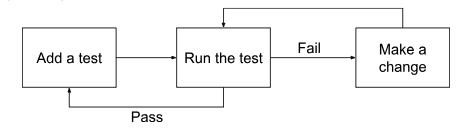